<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Exercise 3c - Transforming our data</center></h1>

<h3>Instructions </h3>
<p> In this exercise you will learn more about concepts such as normalization and transformation. We will be using these tools to make our data into a more valid format for input later into a machine learning model or perhaps for further analysis. Since whichever way we go almost will lead us down the path of statistics when it comes to analyzing a dataset, having normalized and easy to work with values are often a high priority. Lets get to it!

A short discussion will also be presented at the end of the section where I discuss the topic of the almost 50% missing bean types.</p>

<h3> 1. Necessary Setup </h3>

In [2]:
import numpy as np
import pandas as pd

# Remeber you need to have the file accessible locally! This is the new csv file we created in 3b.
# We dont even need the wierd stuff when loading as we did in 3b because we have fixed it! Wow
df = pd.read_csv("edited_choco.csv")
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


<h3> 2. Transforming and normalizing values</h3>
<h4> 2.1 Normalizing values </h4>
<p>Commonly in statistical analysis we make use of numbers in the range 0 to 1, this helps a lot for situations where you use clustering or machine learning or plots because otherwise values that are otherwise huge would overtake the smaller ones (for example REF vs Rating). The approach we use here is called Min-max feature scaling and the formula can be be found for example here https://en.wikipedia.org/wiki/Normalization_(statistics). Note: You can use built-in features to perform the normalization but I thought I would showcase the self-coded example<p>

In [3]:
# Loading neccesary values for normalization
rating_min = df["Rating"].min()
rating_max = df["Rating"].max()

def normalize_values(col_value):
    normalized_val = np.divide(col_value - rating_min, rating_max - rating_min)
    return normalized_val

df["Rating"] = df["Rating"].apply(normalize_values)
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,0.6875,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,0.4375,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,0.5000,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,0.6250,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,0.6250,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,0.6875,NaN,Peru
1791,Zotter,Congo,749,2011,65%,Austria,0.5000,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,0.6250,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,0.5625,NaN,India


<h4>2.2 Short discussion on REF and Review Date columns </h4>
<p>According to the creators of the dataset found here https://www.kaggle.com/rtatman/chocolate-bar-ratings REF and Review dates can be expained as:

REF: A value linked to when the review was entered in the database. Higher = more recent.

Review Date: Date of publication of the review.

This makes transforming the data quite.. wierd? Does it make sense to normalize or standardize these columns and does it even make sense to have them? In my opinion (There is no absolute wrong or right) I would not include the REF columns if I were to train a machine learning algorithm on the data to predict say the rating. This is because REF refers to how recently something was updated, which does in no way at all prove whether or not it has led to a good rating. A ML algorithm does not understand this reasoning but for us as people it makes no sense. Sort of the same can be said about the Review Date but this time a bit more relevant as opinions on a particular taste might vary with trends. I would nevertheless remove that column as well. In short I would create a separate dataset containing the REF and Review dates.</p>

<h4>2.3 Converting Cocoa Percent into float </h4>
<p>A bit magical in approach; a short explanation: </p>

<ul>
    <li>.str ensures that we are working on a string object</li>
    <li>.rstrip removes a specified character</li>
    <li>astype converts it into specified type</li>
</ul>

Worth noting is that if you run the cell below more than once you will get an error because in that situation the column has already been converted into a float, thus the str.rstrip functionality will yield an error and the code wont work. To circumvent this either only run the cell once or write some code of your own to avoid this! For example you can write an if statement that checks the current type of the column and if its a string do nothing

In [7]:
cocoa_without_percent = df["Cocoa\nPercent"].str.rstrip("%")
cocoa_in_decimal = cocoa_without_percent.astype(float)/100
df["Cocoa\nPercent"] = cocoa_in_decimal
df


AttributeError: Can only use .str accessor with string values!

<h4>2.4 Discussion on the Bean Type column </h4> 
<p>Although there is no coding here I thought I would present my thoughts on the Bean Type column as it might be of interest to some of you. As a reminder, Bean Type was missing for nearly 50% of the samples, thereafter it was broad bean origin with only about 4% of data missing. 

In some machine learning applications or in statistical analysis even no value can represent a "class" or an output. Maybe the algorithm gets trained in a specific way with regards to missing values, i.e in case there is missing values we might score it as this or this rating. When it comes to the Broad Bean Origin which was missing about 4% it is absolutely fine and we can be satisfied with leaving it as is. You can create a fictional label by comparing the broad bean origin to similar samples, but it can also warp the data and is a bit risky. For this situation it is recommended to leave it as is.
    
Bean Type however is more tricky. With about 50% data missing it will warp statistical and machine learning applications and is definitely considered as the threshold for when to drop or remove an attribute. For most intents and purposes the Bean Type column would make our analysis more inaccurate than precise and it would be wise to remove the attribute. However this will not be done here but if you in the future come back to this dataset and want to train a ML algorithm it is interesting to compare the results with or without the column
</p>


<h4>2.5 Open-ended exercise </h4>
<p>Here are some suggestions for what you can do yourself to further your knowledge on the area: </p>
<ul>
    <li>Go to Kaggle.com/datasets and search for a dataset of  your choosing (I recommend staying around less than 1MB in file size). Try to find something with few columns </li>
    <li>From scratch yourself perform the follow operations: Identify if there exists empty rows and remove them, drop columns lacking a lot of data, transform data and get a feel for how the data is split with functionalities that has been showcased here in the exercises such as a table to get a general overview of the data represented. </li>
</ul>
<p>Another suggestion is to keep toying around with this dataset but try creating new entries! Go into the CSV file, add a row with some type of wierd data (say the wrong type, an extreme outlier or something equivalent, then identify how you could identify that type of data in code. An example would be to add a review date entry that is something like 100000, you could then toy around with something like df.boxplot() which is a pandas boxplot good for getting an overview of the data </p>


<h4>3. Closing Remarks </h4>
<p>Well done! You have now learnt a LOT of the basics of working with data. As I advised in the lecture I highly recommend checking out the youtube channel Computerphile and their series on Data (link can be found in the lecture). Although it is in R it is very informative and I consider it to be one of the best series to start out with when beginning your journey on data analysis </p>

<Axes: >

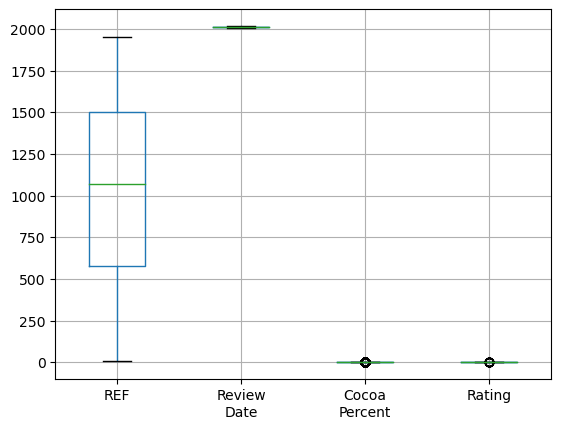

In [8]:
df.boxplot()
